## Comparaison des distances sur des simulations de modèles de ressorts perturbés

Chaque jeu de simulation a été simulé pour des paramètres `(F, k)` fixés. Le bruit et les conditions intiales sont aléatoires et varient selon chaque simulation.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import pandas as pd
from tqdm import tqdm
import pickle

from descriptor import compute_descriptor
from wasserstein_distance import compute_wasserstein_distance
from kolmogorov_distance import compute_kolmogorov_dist
from data_functions import load_data, plot_data

In [2]:
## Chargement de fichiers Pickle

def save_obj(obj, name):
    with open(name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

### Load data

In [3]:
all_simus = load_obj("./data/ressort/simus.pkl")

print("{} parameters tested, and {} simus for each parameter.".format(len(all_simus),
                                                                      all_simus[0]['N']))
print("The duration of each simu is {} dt.".format(np.shape(all_simus[0]['simu'])[1]))

100 parameters tested, and 100 simus for each parameter.
The duration of each simu is 300 dt.


`all_simu` contient les simulations, chaque élément contient les paramètres et toutes les simulations effectuées avec ces paramètres dans l'item `simu`

In [4]:
all_simus[0]

{'F': 0.0,
 'N': 100,
 'Vmax': 6,
 'Vmin': 0.5,
 'k': 0.0,
 'simu': array([[ -1.35593632e+00,  -4.61405077e+00,  -6.59039679e+00, ...,
           5.81880819e+03,   5.85780417e+03,   5.89656731e+03],
        [ -2.60709537e+00,   6.84399691e-01,   3.52540168e+00, ...,
           8.85774675e+02,   8.87105790e+02,   8.87646710e+02],
        [ -2.28820243e+00,   2.77971844e+00,   6.52096793e+00, ...,
           4.87942993e+03,   4.91752817e+03,   4.95560358e+03],
        ..., 
        [ -2.54971281e+00,  -2.25883923e+00,  -2.36798379e+00, ...,
           5.36442884e+03,   5.39123241e+03,   5.41955270e+03],
        [ -3.95425831e+00,   4.19723543e+00,   1.33150300e+01, ...,
           1.10577101e+04,   1.10912033e+04,   1.11250170e+04],
        [ -1.55051404e+00,  -2.20015802e+00,  -3.82142929e+00, ...,
           5.64349227e+03,   5.66772478e+03,   5.69357886e+03]])}

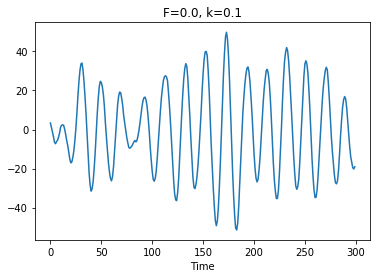

In [5]:
def plot_a_simu(i, j):
    """ Plot the jth simu of the ith parameters """
    plt.plot(all_simus[i]['simu'][j, :])
    plt.title("F={}, k={}".format(all_simus[i]['F'], all_simus[i]['k']))
    plt.xlabel('Time')
    plt.show()
    
plot_a_simu(10, 10)

#### Mettre sous la forme DataFrame comme les simus de poumons
Format qu'il faudrait que l'on change parce qu'il est pas ouf mais bon...

In [28]:
def transform_simus_to_df(all_simus, nmax=None):
    
    if not nmax:  # Par defaut on met tout
        nmax = all_simus[0]['N']
        
    sets = []
    for simu in all_simus:
        df = pd.DataFrame(simu['simu'].T)  # .T pour transposee, on a pris la convention dans l'autre sens
        df.columns = ['V' + str(i) for i in range(simu['simu'].shape[0])]
        df = df[['V' + str(i) for i in range(nmax)]]
        sets.append(df)
    return sets

sets = transform_simus_to_df(all_simus, nmax=40)

In [29]:
def plot_df(df, nmax=None):
    if not nmax:
        nmax = df.shape[1]
    for col in df.columns[:nmax]:
        df[col].plot()
    plt.show()

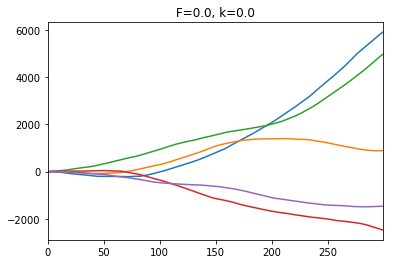

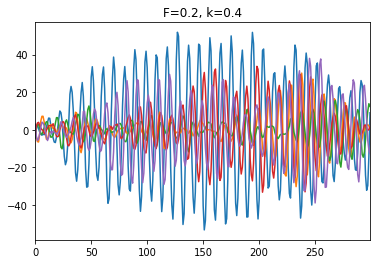

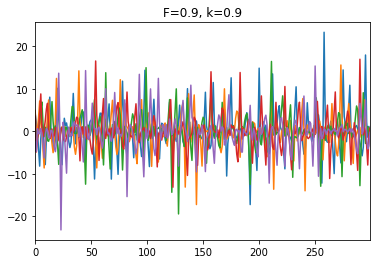

In [30]:
# Exemples de simus

plt.title("F={}, k={}".format(all_simus[0]['F'],all_simus[0]['k']))
plot_df(sets[0], nmax=5)

i = 42
plt.title("F={}, k={}".format(all_simus[i]['F'], all_simus[i]['k']))
plot_df(sets[i], nmax=5)

i = 99
plt.title("F={}, k={}".format(all_simus[i]['F'], all_simus[i]['k']))
plot_df(sets[i], nmax=5)

In [31]:
df1 = sets[0]
df1.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39
0,-1.355936,-2.607095,-2.288202,-2.408651,2.628272,1.076935,-3.587900,-4.589422,-0.505299,4.724001,...,0.423284,-3.859904,2.613816,-1.891223,-2.964619,-0.634607,0.792595,4.582637,1.484102,-0.349779
1,-4.614051,0.684400,2.779718,-0.630166,4.730888,-3.547141,-1.112174,1.634252,-4.854920,-2.633669,...,0.005537,3.459346,4.081853,-1.139913,0.523259,0.920234,-2.992662,-2.015335,4.748191,-2.361295
2,-6.590397,3.525402,6.520968,2.192426,6.846604,-7.393961,3.417335,8.666185,-9.097073,-9.257082,...,-0.373254,11.556590,6.583548,0.008068,3.312687,2.871141,-7.540435,-8.631380,6.969745,-4.273293
3,-8.159213,7.630873,9.811351,3.713413,8.778949,-12.748646,7.041450,16.645119,-13.032834,-16.372250,...,-0.225212,19.729328,10.674504,2.928681,7.167993,5.461699,-12.623253,-14.347025,8.861652,-5.246939
4,-9.815893,10.412904,13.823077,5.103821,10.129731,-18.846906,10.007471,23.592886,-17.710451,-23.841442,...,-0.210048,28.359764,14.913202,5.811350,11.788119,8.271813,-16.767392,-17.198106,10.969028,-6.593432


In [32]:
compute_kolmogorov_dist(sets[0], sets[42]), compute_kolmogorov_dist(sets[41], sets[42])

(0.99999897240120728, 0.38727842474679686)

In [33]:
start_time = time.time()
d = compute_wasserstein_distance(sets[0], sets[42])
print("Execution time: {} min".format(round((time.time() - start_time) / 60, 2)))
print("Distance:", d)

Execution time: 0.03 min
Distance: 292970.275019


### Calculer les distances entre chaque couple de simus

In [50]:
def compute_dist_sets(sets):
    distances = []
    
    for df1 in tqdm(sets):
    #for df1 in [sets[42]]:
        for df2 in tqdm(sets):
            kolm_dist = compute_kolmogorov_dist(df1, df2)
            wasser_dist = compute_wasserstein_distance(df1, df2)
            distances.append([kolm_dist, wasser_dist])
            
    return np.array(distances)

def plot_comparaison(distances):
    plt.scatter(distances[:, 0], distances[:, 1], marker='x')
    plt.xlabel("Kolmogorov distance")
    plt.ylabel("Wasserstein distance")
    plt.title("Comparaison des distances")
    plt.show()

In [ ]:
distances = compute_dist_sets(sets)

save_obj(distances, './data/distances_ressort.pkl')

  9%|███████▍                                                                          | 9/100 [00:15<02:35,  1.71s/it]

In [ ]:
plot_comparaison(distances)

In [ ]:
distances

In [ ]:
plt.scatter(distances[:20, 0], distances[:20, 1], marker='x')
plt.show()